In [119]:
import sys
import os
import platform
import importlib
import glob

import numpy as np
import pandas as pd
import datetime
import netCDF4

if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive'
    cpuserver_data_FP = '/Users/hyunglokkim/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.AMSR2_LPRM as hAMSR2_LPRM
import HydroAI.Grid as hGrid
import HydroAI.Plot as hPlot
import HydroAI.Data as hData
import HydroAI.Grid as hGrid
importlib.reload(hAMSR2_LPRM);
importlib.reload(hPlot);
importlib.reload(hData);
importlib.reload(hGrid);

# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

# Define your directory where to save nc files
nc_save_dir = cpuserver_data_FP + '/extracted_nc'

## 1. Import and save AMSR2 LPRM DS SM (10 km) or LPRM SM (25 km)

In [2]:
year = 2022
mission = 'AMSR2'
mission_product = 'LPRM' # 10 km SM data for 'LPRM_DS'
path = 'A'
directory = os.path.join(cpuserver_data_FP, mission, mission_product, path)
file_list, data_doy = hAMSR2_LPRM.extract_filelist_doy(directory, year) 
longitude, latitude = hGrid.generate_lon_lat_eqdgrid(0.25) # 0.1 for LPRM DS

In [3]:
# Examples (import SMOS-IC data with specific year and overpass time)
A2_SM_x = hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_x')*0.01
A2_SM_x = hAMSR2_LPRM.correct_shape(A2_SM_x)
A2_mask = hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'mask')
A2_mask = hAMSR2_LPRM.correct_shape(A2_mask)

Processing files: 100%|███████████████████████| 364/364 [00:04<00:00, 82.43it/s]


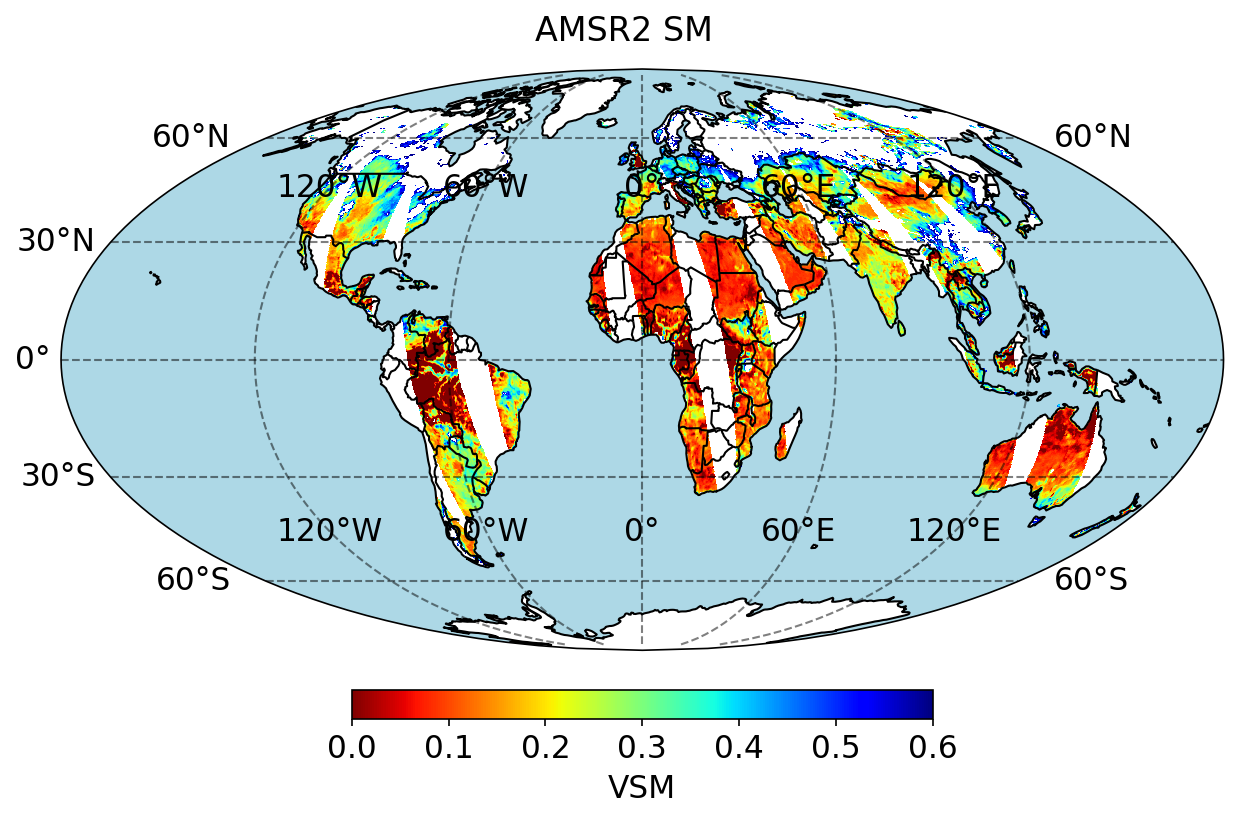

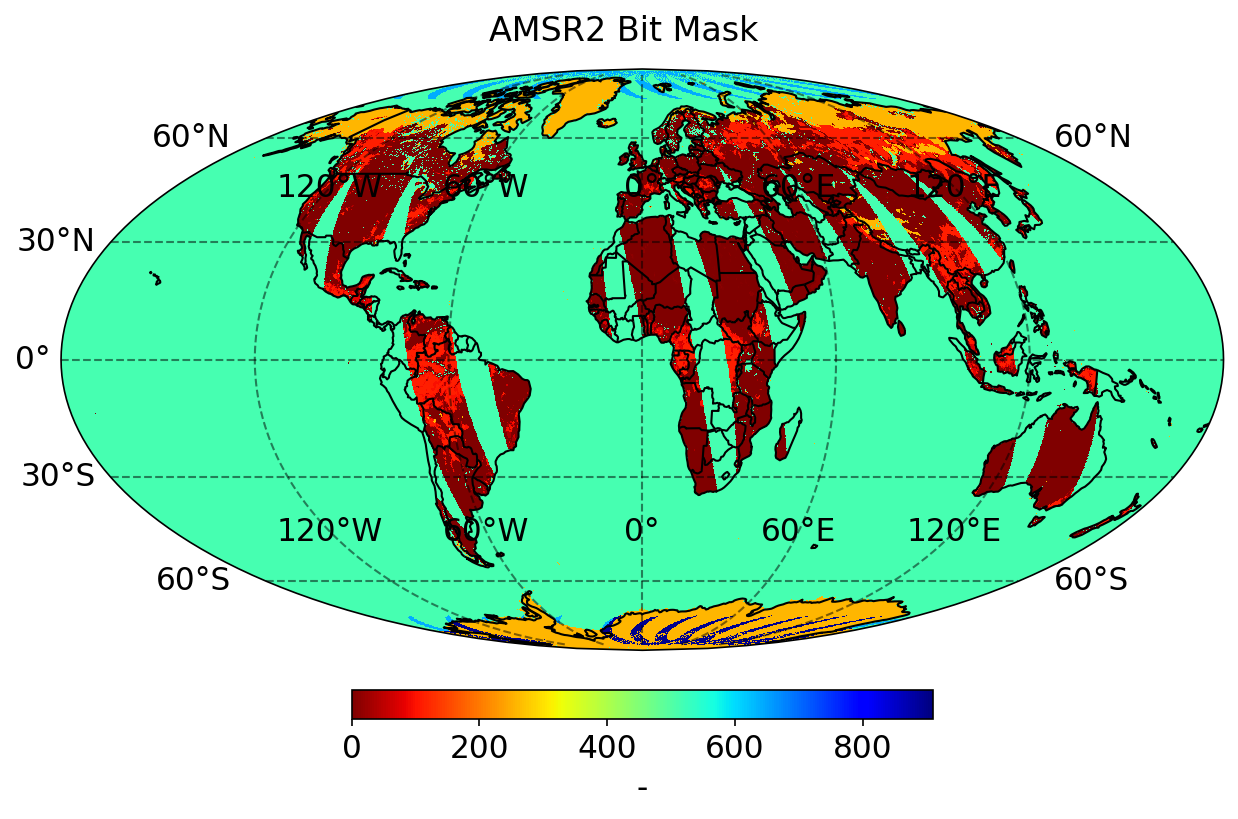

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [60]:
# Check the imported data
doy = 300
target = A2_SM_x
target[(target < 0) | (target > 0.6)] = np.nan
hPlot.plot_map(longitude, latitude, target[:,:,doy], np.nanmin(target), np.nanmax(target), plot_title='AMSR2 SM', label_title='VSM', cmap='jet_r')
target = A2_mask
hPlot.plot_map(longitude, latitude, target[:,:,doy], np.nanmin(target), np.nanmax(target), plot_title='AMSR2 Bit Mask', label_title='-', cmap='jet_r')

In [127]:
path_list = ['A', 'D'] # 1:30 PM Ascending / 1:30 AM Descending
for year in range(2012, 2024): 
    for path in path_list:
        print(year, path)
        directory = os.path.join(cpuserver_data_FP, mission, mission_product, path)
        file_list, data_doy = hAMSR2_LPRM.extract_filelist_doy(directory, year)

        # Import Variables
        A2_SM_x = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_x'))*0.01
        A2_SM_x[A2_SM_x<=0] = np.nan
        A2_SM_c1 = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_c1'))*0.01
        A2_SM_c1[A2_SM_c1<=0] = np.nan
        A2_SM_c2 = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'soil_moisture_c2'))*0.01
        A2_SM_c2[A2_SM_c2<=0] = np.nan
        A2_mask = hAMSR2_LPRM.correct_shape(hAMSR2_LPRM.create_array_from_nc(file_list, data_doy, year, 'mask'))

        # Create a NetCDF file
        path_time = 'am' if path == 'D' else 'pm'
        file_name = f'{mission}_{mission_product}_{year}_{path_time}.nc'
        nc_file_name = os.path.join(nc_save_dir, file_name)

        time_suffix = 'AM' if path == 'D' else 'PM'

        print(f"Saving: {nc_file_name}")
        hData.create_netcdf_file(
        nc_file=nc_file_name, 
        latitude=latitude, 
        longitude=longitude,
        **{f'A2_SM_x_{time_suffix}': A2_SM_x, 
           f'A2_SM_c1_{time_suffix}': A2_SM_c1, 
           f'A2_SM_c2_{time_suffix}': A2_SM_c2, 
           f'A2_mask_{time_suffix}': A2_mask})

        print(f"NetCDF file created: {nc_file_name}")

2012 A


Processing files: 100%|███████████████████████| 182/182 [00:02<00:00, 90.36it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2012_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2012_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2012_pm.nc
2012 D


Processing files: 100%|███████████████████████| 182/182 [00:01<00:00, 93.69it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2012_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2012_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2012_am.nc
2013 A


Processing files: 100%|███████████████████████| 362/362 [00:03<00:00, 91.93it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2013_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2013_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2013_pm.nc
2013 D


Processing files: 100%|███████████████████████| 362/362 [00:03<00:00, 92.39it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2013_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2013_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2013_am.nc
2014 A


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 92.85it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2014_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2014_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2014_pm.nc
2014 D


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 91.87it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2014_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2014_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2014_am.nc
2015 A


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 92.83it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2015_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2015_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2015_pm.nc
2015 D


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 94.08it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2015_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2015_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2015_am.nc
2016 A


Processing files: 100%|███████████████████████| 366/366 [00:03<00:00, 94.33it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2016_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2016_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2016_pm.nc
2016 D


Processing files: 100%|███████████████████████| 366/366 [00:03<00:00, 95.93it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2016_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2016_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2016_am.nc
2017 A


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 92.19it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2017_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2017_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2017_pm.nc
2017 D


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 94.33it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2017_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2017_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2017_am.nc
2018 A


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 92.10it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2018_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2018_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2018_pm.nc
2018 D


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 93.63it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2018_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2018_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2018_am.nc
2019 A


Processing files: 100%|███████████████████████| 366/366 [00:03<00:00, 94.78it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2019_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2019_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2019_pm.nc
2019 D


Processing files: 100%|███████████████████████| 366/366 [00:03<00:00, 94.41it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2019_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2019_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2019_am.nc
2020 A


Processing files: 100%|███████████████████████| 366/366 [00:03<00:00, 95.64it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2020_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2020_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2020_pm.nc
2020 D


Processing files: 100%|███████████████████████| 366/366 [00:03<00:00, 98.64it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2020_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2020_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2020_am.nc
2021 A


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 95.37it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2021_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2021_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2021_pm.nc
2021 D


Processing files: 100%|███████████████████████| 365/365 [00:03<00:00, 96.18it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2021_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2021_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2021_am.nc
2022 A


Processing files: 100%|███████████████████████| 364/364 [00:03<00:00, 92.73it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2022_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2022_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2022_pm.nc
2022 D


Processing files: 100%|███████████████████████| 364/364 [00:03<00:00, 96.26it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2022_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2022_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2022_am.nc
2023 A


Processing files: 100%|███████████████████████| 362/362 [00:03<00:00, 92.68it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2023_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2023_pm.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2023_pm.nc
2023 D


Processing files: 100%|███████████████████████| 363/363 [00:03<00:00, 93.68it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2023_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2023_am.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2023_am.nc


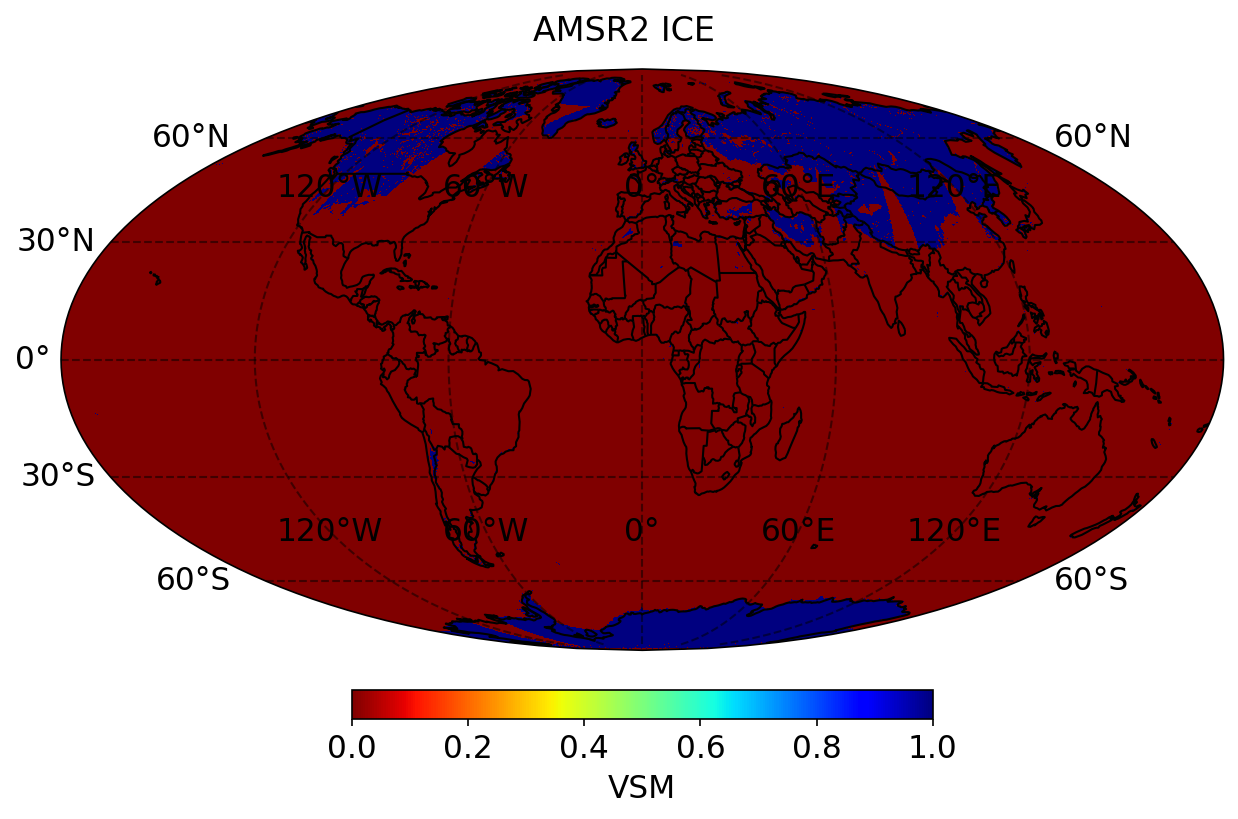

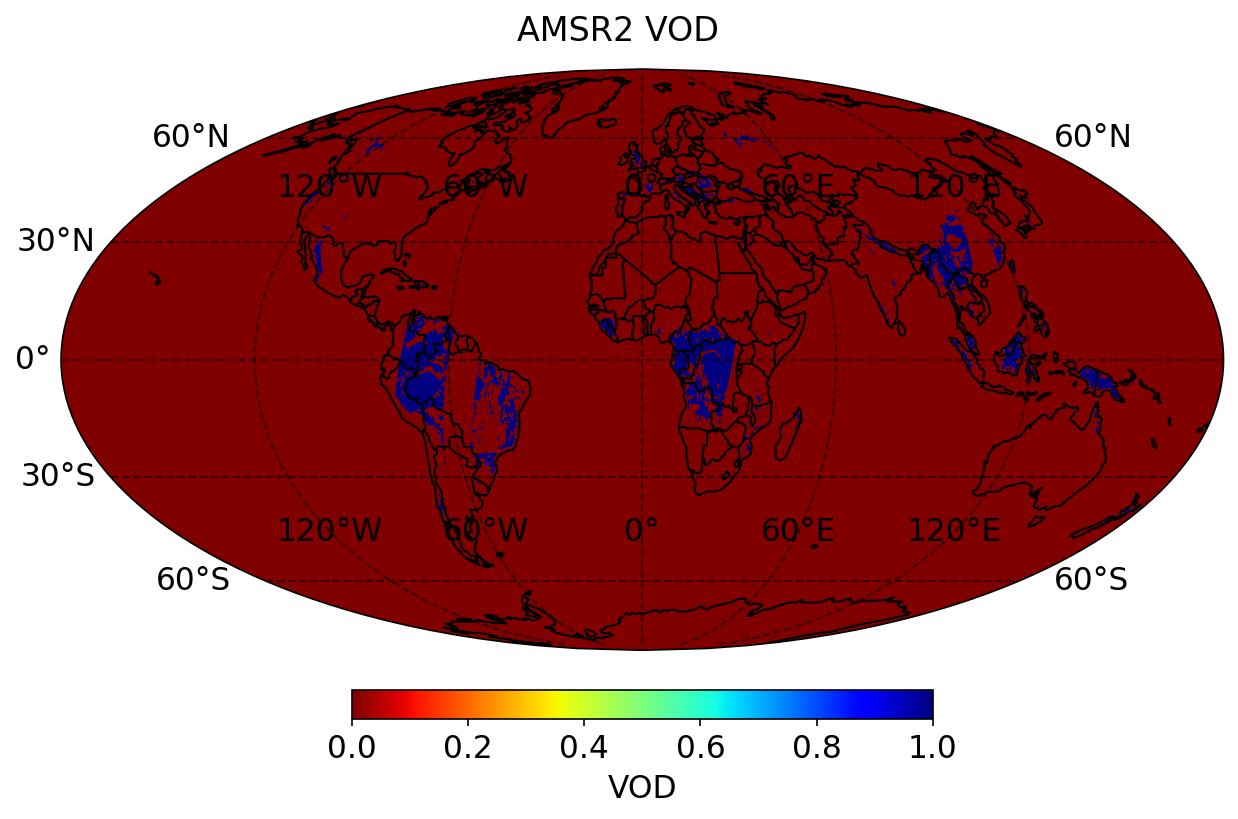

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [129]:
# check ice
doy = 2
is_ice = hAMSR2_LPRM.create_mask(A2_mask, 8) # 8 is for the ice detection
target = is_ice[:,:,doy]
hPlot.plot_map(longitude, latitude, target, np.nanmin(target), np.nanmax(target), plot_title='AMSR2 ICE', label_title='VSM', cmap='jet_r')
# check dense vegetation
is_veg_x = hAMSR2_LPRM.create_mask(A2_mask, 4) # 4 is for the high optical depth value in X
target = is_veg_x[:,:,doy]
hPlot.plot_map(longitude, latitude, target, np.nanmin(target), np.nanmax(target), plot_title='AMSR2 VOD', label_title='VOD', cmap='jet_r')

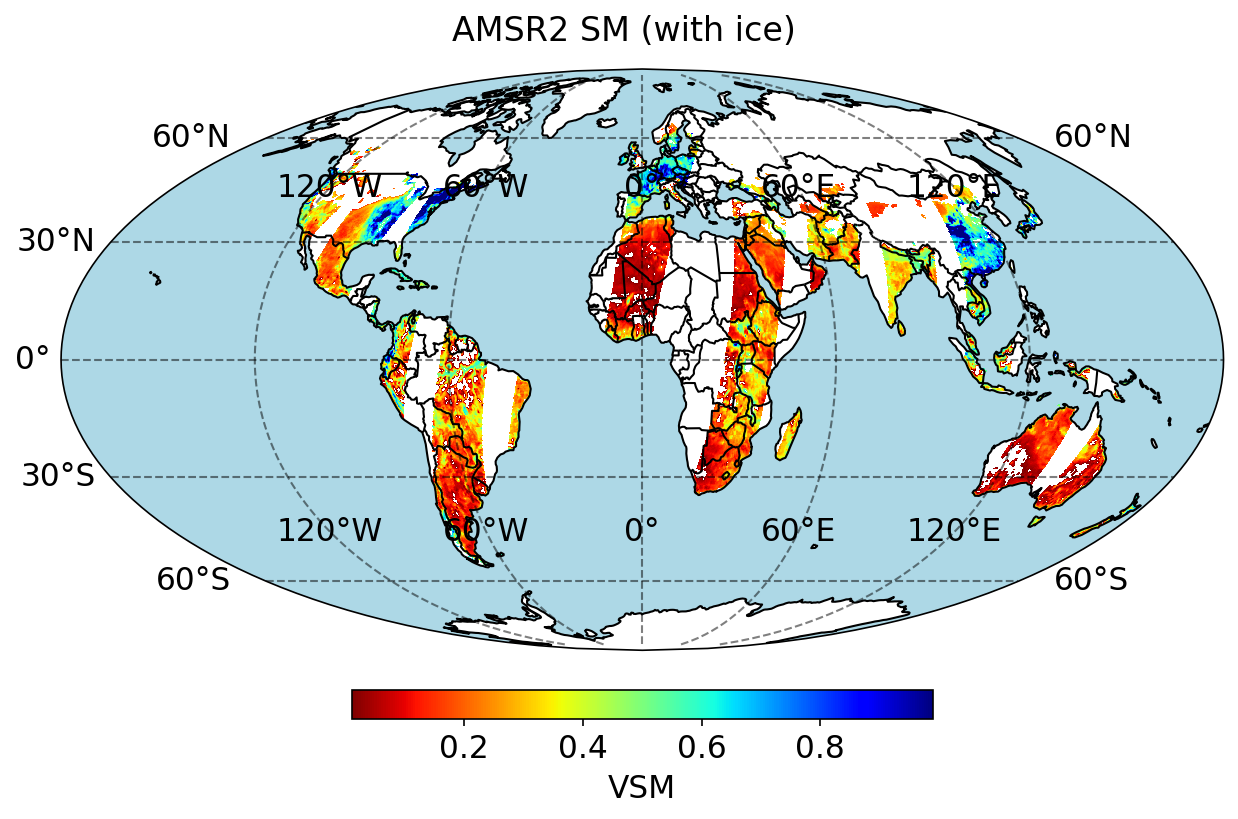

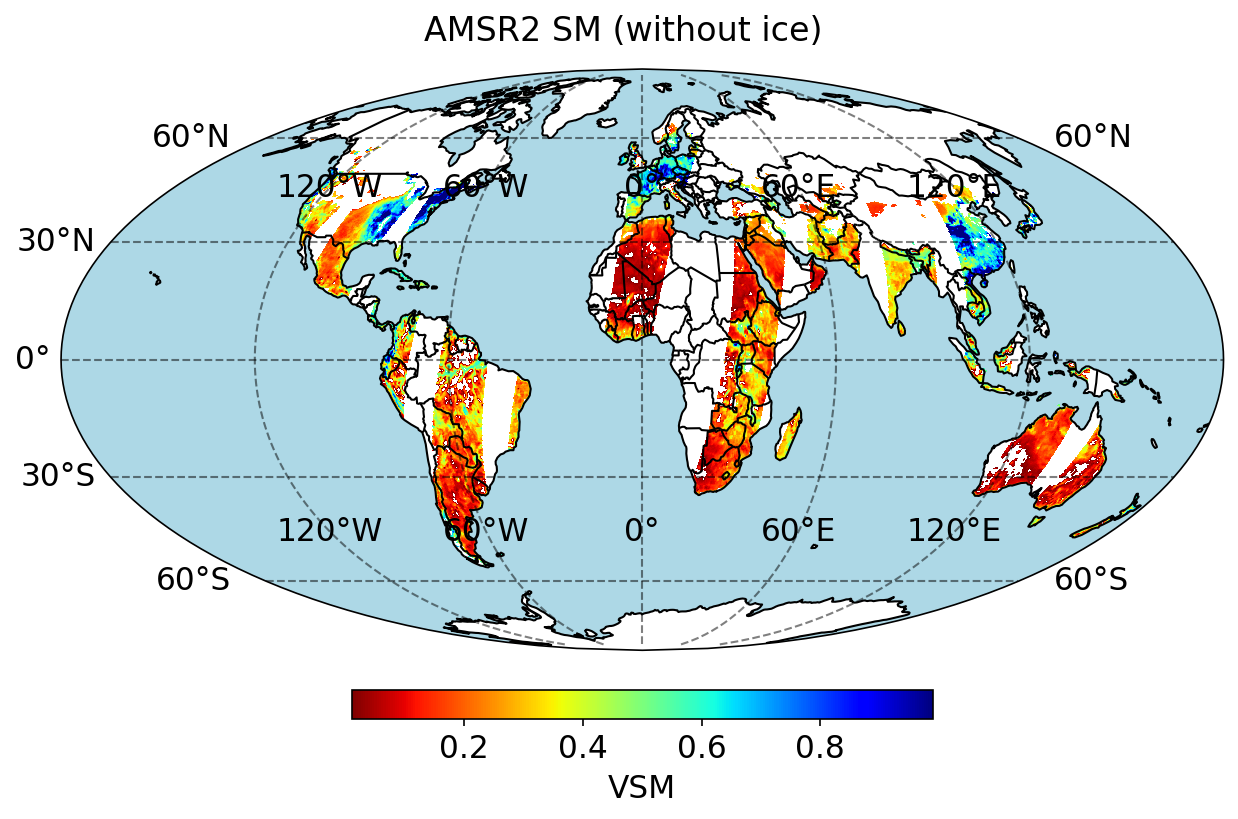

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [130]:
doy = 10
target = A2_SM_x[:,:,doy].copy()
target[target<=0] = np.nan
hPlot.plot_map(longitude, latitude, target, np.nanmin(target), np.nanmax(target), plot_title='AMSR2 SM (with ice)', label_title='VSM', cmap='jet_r')
target[is_ice[:,:,doy]==1] = np.nan
hPlot.plot_map(longitude, latitude, target, np.nanmin(target), np.nanmax(target), plot_title='AMSR2 SM (without ice)', label_title='VSM', cmap='jet_r')

## 2. Resample AMSR2 LPRM data (with QC)
Masked data if one of the following conditions was met (Kim et al. (2023)):
1) SM was smaller than 0 cm3cm− 3 higher than 0.60 cm3cm− 3
2) the Tb-RMSE flag values were larger than 5 K.
3) or the science flag was greater than one,

In [134]:
target_projection = 'Noah_025'
A2_lon, A2_lat = hGrid.generate_lon_lat_eqdgrid(0.25)
domain_lon, domain_lat = hGrid.generate_lon_lat_eqdgrid(0.25)

domain_lon = domain_lon[:600, :]
domain_lat = domain_lat[:600, :]

path_list = ['am', 'pm']
for year in range(2012, 2024):
    
    for path in path_list:
        time_suffix = 'AM' if path == 'am' else 'PM'
        # resample SMOS into the doamin size
        nc_file  = nc_save_dir+'/'+mission+'_'+mission_product+'_'+str(year)+'_'+path+'.nc'
        print(nc_file)
        nc_data  = netCDF4.Dataset(nc_file)
        A2_SM_x  = nc_data.variables['A2_SM_x_'+time_suffix][:].data
        A2_SM_c1  = nc_data.variables['A2_SM_c1_'+time_suffix][:].data
        A2_SM_c2  = nc_data.variables['A2_SM_c2_'+time_suffix][:].data
        
        A2_SM_x_QC  = A2_SM_x.copy()
        A2_SM_c1_QC = A2_SM_c1.copy()
        A2_SM_c2_QC = A2_SM_c2.copy()
        A2_mask     = nc_data.variables['A2_mask_'+time_suffix][:].data
        is_ice      = hAMSR2_LPRM.create_mask(A2_mask, 8)
        nc_data.close()

        # Masking data with ice
        A2_SM_x_QC[(A2_SM_x <= 0) | (A2_SM_x > 0.6)] = np.nan
        A2_SM_x_QC[(is_ice == 1)] = np.nan 
        
        A2_SM_c1_QC[(A2_SM_c1 <= 0) | (A2_SM_c1 > 0.6)] = np.nan
        A2_SM_c1_QC[(is_ice == 1)] = np.nan 
        
        A2_SM_c2_QC[(A2_SM_c2 <= 0) | (A2_SM_c2 > 0.6)] = np.nan
        A2_SM_c2_QC[(is_ice == 1)] = np.nan 
        
        Resampled_A2_SM_x  = hData.Resampling_forloop(domain_lon, domain_lat, A2_lon, A2_lat, A2_SM_x, mag_factor=1)
        Resampled_A2_SM_c1 = hData.Resampling_forloop(domain_lon, domain_lat, A2_lon, A2_lat, A2_SM_c1, mag_factor=1)
        Resampled_A2_SM_c2 = hData.Resampling_forloop(domain_lon, domain_lat, A2_lon, A2_lat, A2_SM_c2, mag_factor=1)
        
        Resampled_A2_SM_x_QC  = hData.Resampling_forloop(domain_lon, domain_lat, A2_lon, A2_lat, A2_SM_x_QC, mag_factor=1)
        Resampled_A2_SM_c1_QC = hData.Resampling_forloop(domain_lon, domain_lat, A2_lon, A2_lat, A2_SM_c1_QC, mag_factor=1)
        Resampled_A2_SM_c2_QC = hData.Resampling_forloop(domain_lon, domain_lat, A2_lon, A2_lat, A2_SM_c2_QC, mag_factor=1)
        file_name = mission+'_'+mission_product+'_'+str(year)+'_'+path+'_R_'+target_projection+'.nc'
        nc_file_name = nc_save_dir+'/'+file_name
        
        print(f"Saving: {nc_file}")
        hData.create_netcdf_file(
        nc_file    = nc_file_name,
        latitude   = domain_lat,
        longitude  = domain_lon,
        Resampled_A2_SM_x     = Resampled_A2_SM_x,
        Resampled_A2_SM_x_QC  = Resampled_A2_SM_x_QC,
        Resampled_A2_SM_c1    = Resampled_A2_SM_c1,
        Resampled_A2_SM_c1_QC = Resampled_A2_SM_c1_QC,
        Resampled_A2_SM_c2    = Resampled_A2_SM_c2,
        Resampled_A2_SM_c2_QC = Resampled_A2_SM_c2_QC)

        print(f"NetCDF file created: {nc_file}")

/data/extracted_nc/AMSR2_LPRM_2012_am.nc


100%|█████████████████████████████████████████| 367/367 [00:08<00:00, 43.23it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2012_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2012_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2012_am.nc
/data/extracted_nc/AMSR2_LPRM_2012_pm.nc


100%|█████████████████████████████████████████| 367/367 [00:09<00:00, 39.86it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2012_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2012_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2012_pm.nc
/data/extracted_nc/AMSR2_LPRM_2013_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 32.22it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2013_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2013_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2013_am.nc
/data/extracted_nc/AMSR2_LPRM_2013_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:12<00:00, 28.22it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2013_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2013_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2013_pm.nc
/data/extracted_nc/AMSR2_LPRM_2014_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 31.86it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2014_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2014_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2014_am.nc
/data/extracted_nc/AMSR2_LPRM_2014_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:13<00:00, 27.86it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2014_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2014_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2014_pm.nc
/data/extracted_nc/AMSR2_LPRM_2015_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 31.50it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2015_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2015_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2015_am.nc
/data/extracted_nc/AMSR2_LPRM_2015_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:13<00:00, 27.75it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2015_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2015_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2015_pm.nc
/data/extracted_nc/AMSR2_LPRM_2016_am.nc


100%|█████████████████████████████████████████| 367/367 [00:11<00:00, 31.68it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2016_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2016_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2016_am.nc
/data/extracted_nc/AMSR2_LPRM_2016_pm.nc


100%|█████████████████████████████████████████| 367/367 [00:13<00:00, 28.20it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2016_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2016_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2016_pm.nc
/data/extracted_nc/AMSR2_LPRM_2017_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 32.07it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2017_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2017_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2017_am.nc
/data/extracted_nc/AMSR2_LPRM_2017_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:13<00:00, 28.07it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2017_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2017_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2017_pm.nc
/data/extracted_nc/AMSR2_LPRM_2018_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 32.05it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2018_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2018_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2018_am.nc
/data/extracted_nc/AMSR2_LPRM_2018_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:12<00:00, 28.37it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2018_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2018_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2018_pm.nc
/data/extracted_nc/AMSR2_LPRM_2019_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 32.14it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2019_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2019_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2019_am.nc
/data/extracted_nc/AMSR2_LPRM_2019_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:13<00:00, 28.10it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2019_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2019_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2019_pm.nc
/data/extracted_nc/AMSR2_LPRM_2020_am.nc


100%|█████████████████████████████████████████| 367/367 [00:11<00:00, 31.99it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2020_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2020_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2020_am.nc
/data/extracted_nc/AMSR2_LPRM_2020_pm.nc


100%|█████████████████████████████████████████| 367/367 [00:13<00:00, 28.08it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2020_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2020_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2020_pm.nc
/data/extracted_nc/AMSR2_LPRM_2021_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 31.85it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2021_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2021_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2021_am.nc
/data/extracted_nc/AMSR2_LPRM_2021_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:13<00:00, 27.94it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2021_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2021_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2021_pm.nc
/data/extracted_nc/AMSR2_LPRM_2022_am.nc


100%|█████████████████████████████████████████| 366/366 [00:11<00:00, 32.04it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2022_am.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2022_am_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2022_am.nc
/data/extracted_nc/AMSR2_LPRM_2022_pm.nc


100%|█████████████████████████████████████████| 366/366 [00:12<00:00, 28.19it/s]


Saving: /data/extracted_nc/AMSR2_LPRM_2022_pm.nc
NetCDF file /data/extracted_nc/AMSR2_LPRM_2022_pm_R_Noah_025.nc created successfully.
NetCDF file created: /data/extracted_nc/AMSR2_LPRM_2022_pm.nc


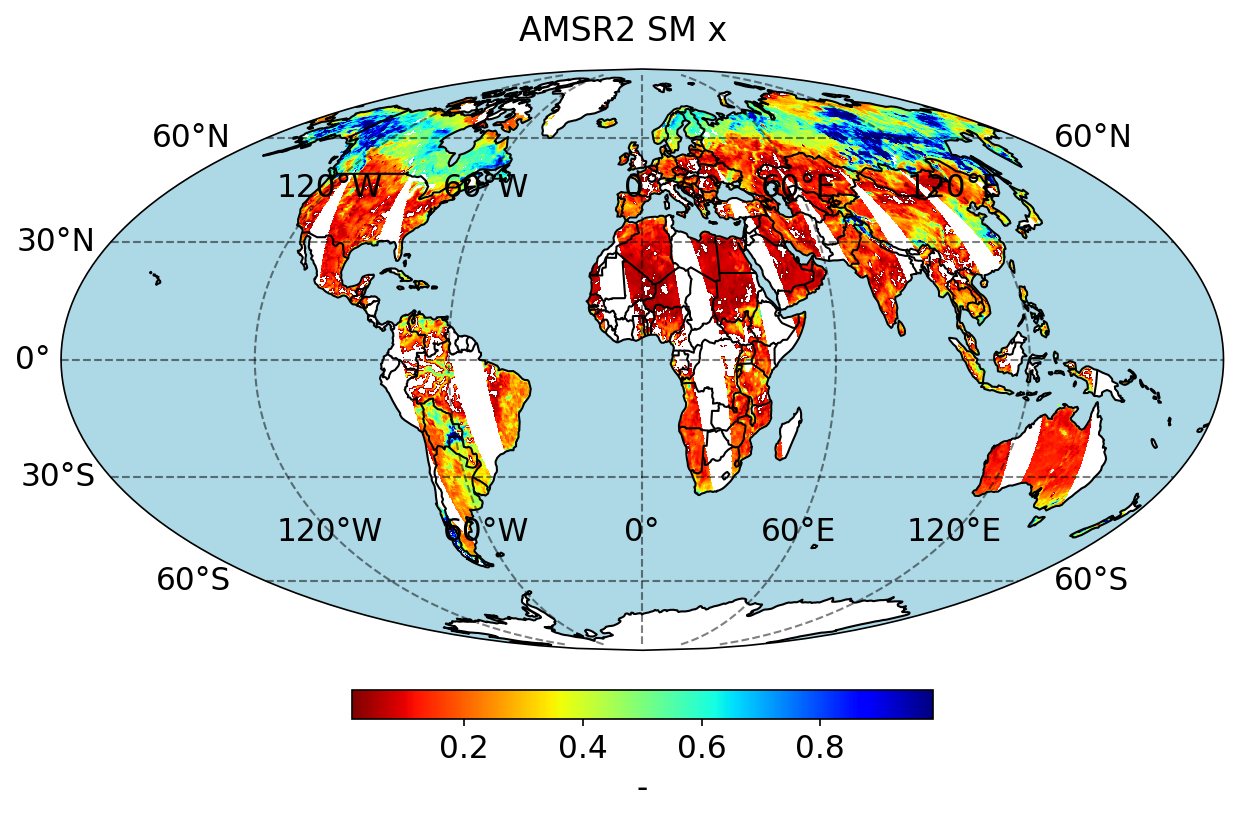

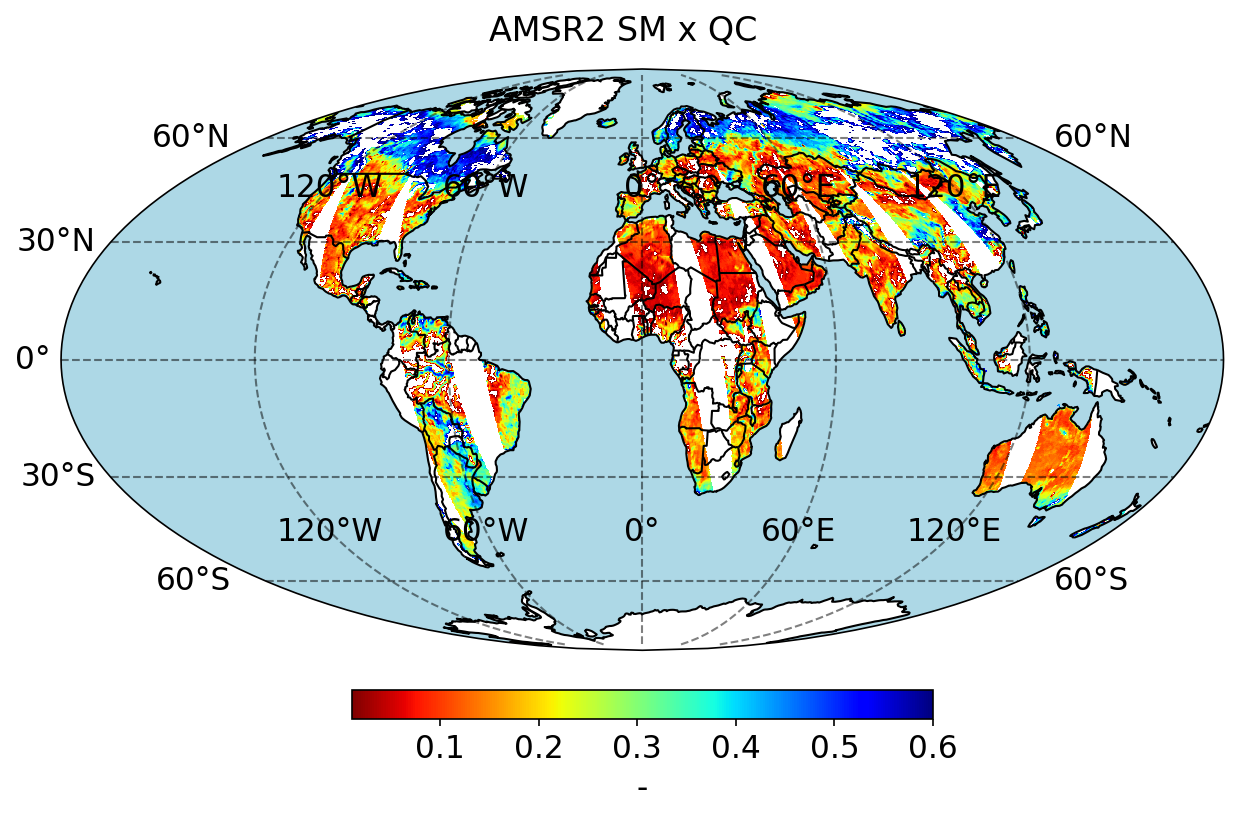

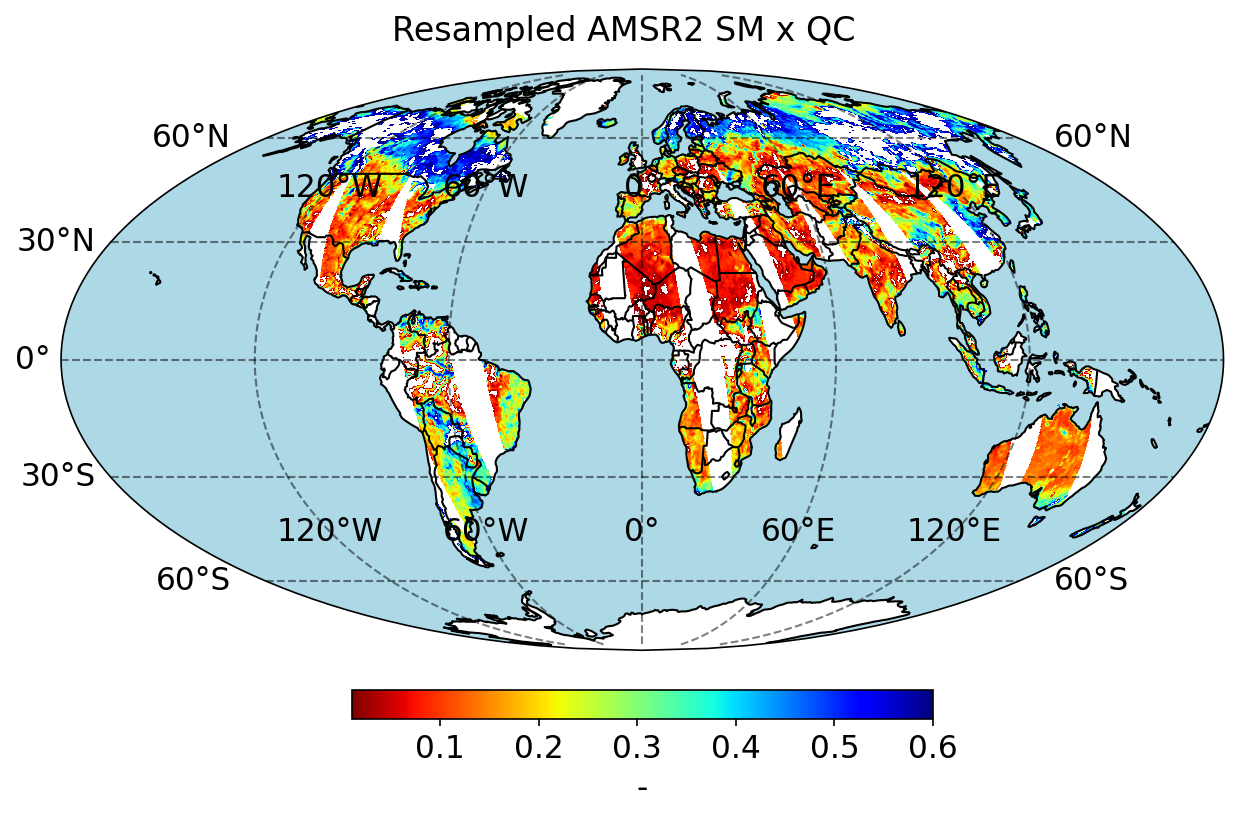

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [133]:
doy = 150
target = A2_SM_x[:,:, doy]
hPlot.plot_map(A2_lon, A2_lat, target, np.nanmin(target), np.nanmax(target), plot_title='AMSR2 SM x', label_title='-', cmap='jet_r')
target = A2_SM_x_QC[:,:,doy]
hPlot.plot_map(A2_lon, A2_lat, target, np.nanmin(target), np.nanmax(target), plot_title='AMSR2 SM x QC', label_title='-', cmap='jet_r')
target = Resampled_A2_SM_x_QC[:,:,doy]
hPlot.plot_map(domain_lon, domain_lat, target, np.nanmin(target), np.nanmax(target), plot_title='Resampled AMSR2 SM x QC', label_title='-', cmap='jet_r')